In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import IPython.display as display

In [2]:
raw_image_dataset = tf.data.TFRecordDataset('/media/hasan/Volume/Intenso/coco/tfrecord/coco_subset.record')

In [21]:
image_feature_description= {
    'image/height': tf.FixedLenFeature([], tf.int64),
    'image/width': tf.FixedLenFeature([], tf.int64),
    'image/object/bbox/xmin': tf.FixedLenFeature([], tf.float32),
    'image/object/bbox/xmax': tf.FixedLenFeature([], tf.float32),
    'image/object/bbox/ymin': tf.FixedLenFeature([], tf.float32),
    'image/object/bbox/ymax': tf.FixedLenFeature([], tf.float32),
    'image/object/class/label': tf.FixedLenFeature([], dtype=tf.int64),
    'image/encoded':tf.FixedLenFeature([], tf.string),
    'image/format': tf.FixedLenFeature([], tf.string),

    
}

In [22]:
def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.parse_single_example(example_proto, image_feature_description)

In [23]:

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)

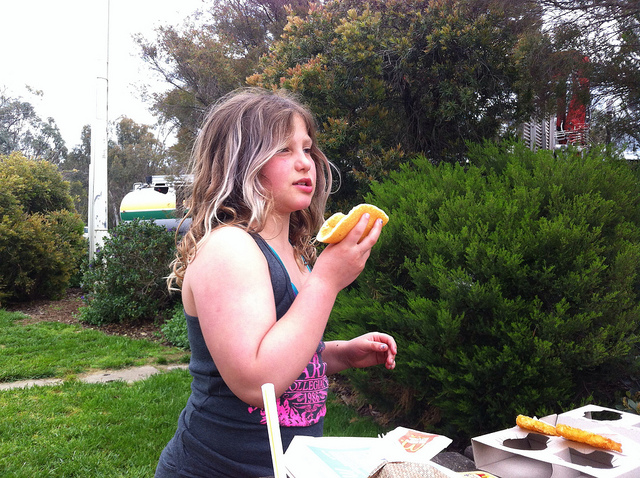

InvalidArgumentError: Key: image/object/class/label.  Can't parse serialized Example.
	 [[{{node ParseSingleExample/ParseSingleExample}}]] [Op:IteratorGetNextSync]

In [62]:
for image_features in parsed_image_dataset.take(5):
  image_raw = image_features['image/encoded'].numpy()
  display.display(display.Image(data=image_raw))

In [6]:
from __future__ import print_function

import collections
import io
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython import display
from sklearn import metrics


In [7]:
def _parse_function(record):
  """Extracts features and labels.
  
  Args:
    record: File path to a TFRecord file    
  Returns:
    A `tuple` `(labels, features)`:
      features: A dict of tensors representing the features
      labels: A tensor with the corresponding labels.
  """
  features = {
    
    'image/object/class/label': tf.FixedLenFeature([], dtype=tf.int64), # labels are 0 or 1
  }
  
  parsed_features = tf.parse_single_example(record, features)
  
  
  labels = parsed_features['image/object/class/label']

  return  labels

In [8]:
ds = tf.data.TFRecordDataset('/media/hasan/Volume/Intenso/coco/tfrecord/coco_subset.record')
# Map features and labels with the parse function.
ds = ds.map(_parse_function)
myGraph = tf.Graph()

In [14]:

# Make a one shot iterator
n = ds.make_one_shot_iterator().get_next()
sess = tf.Session()




In [16]:
output_labels=[]

for i in range(0,60000):
  value=sess.run(n)
  #output_features.append(value[0]['terms'])
  output_labels.append(value[0])

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [71]:
train_record = '/media/hasan/Volume/Intenso/coco/tfrecord/coco_subset.record'

def read_and_decode(filename_queue):
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(
        serialized_example,
        # Defaults are not specified since both keys are required.
        features={
            'image/height': tf.FixedLenFeature([], tf.int64),
            'image/width': tf.FixedLenFeature([], tf.int64),
            'image/encoded': tf.FixedLenFeature([], tf.string),
            'image/format': tf.FixedLenFeature([], tf.string),
            'image/object/bbox/xmin': tf.VarLenFeature(tf.float32),
            'image/object/bbox/xmax': tf.VarLenFeature(tf.float32),
            'image/object/bbox/ymin': tf.VarLenFeature(tf.float32),
            'image/object/bbox/ymax': tf.VarLenFeature(tf.float32),
            'image/object/class/label': tf.VarLenFeature(tf.int64)
        })
    #image = tf.decode_raw(features['image/encoded']).numpy()
    label = tf.cast(features['image/object/class/label'], tf.int32)
    #height = tf.cast(features['image/height'], tf.int32)
    #width = tf.cast(features['image/width'], tf.int32)
    return label


In [125]:
label_list = []
def get_all_records(FILE):
    with tf.Session() as sess:
        filename_queue = tf.train.string_input_producer([ FILE ])
        label= read_and_decode(filename_queue)
        #image = tf.reshape(image, tf.stack([height, width, 3]))
        #image.set_shape([640,480,3])
        init_op = tf.initialize_all_variables()
        sess.run(init_op)
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        for i in range(60000):
            example = sess.run(label)

            label_list.append(example.values)
            #print (example.values)
            
        coord.request_stop()
        coord.join(threads)

In [126]:
get_all_records(train_record)

In [127]:
person = 0
bicycle =0
car=0
motorcycle=0
bus=0
train=0
truck=0
traffic_light=0
stop_sign=0
parking_meter=0



In [128]:
for i in range(len(label_list)):
    for j in range(len(label_list[i])):
        if(label_list[i][j]) == 1:
            person +=1
        elif(label_list[i][j]) == 2:
            bicycle +=1
        elif(label_list[i][j]) == 3:
            car+=1
        elif(label_list[i][j]) == 4:
            motorcycle+=1
        elif(label_list[i][j]) == 5:
            bus+=1
        elif(label_list[i][j]) == 6:
            train+=1
        elif(label_list[i][j]) == 7:
            truck+=1
        elif(label_list[i][j]) == 8:
            traffic_light+=1
        elif(label_list[i][j]) == 9:
            stop_sign+=1
        elif(label_list[i][j]) == 10:
            parking_meter+=1

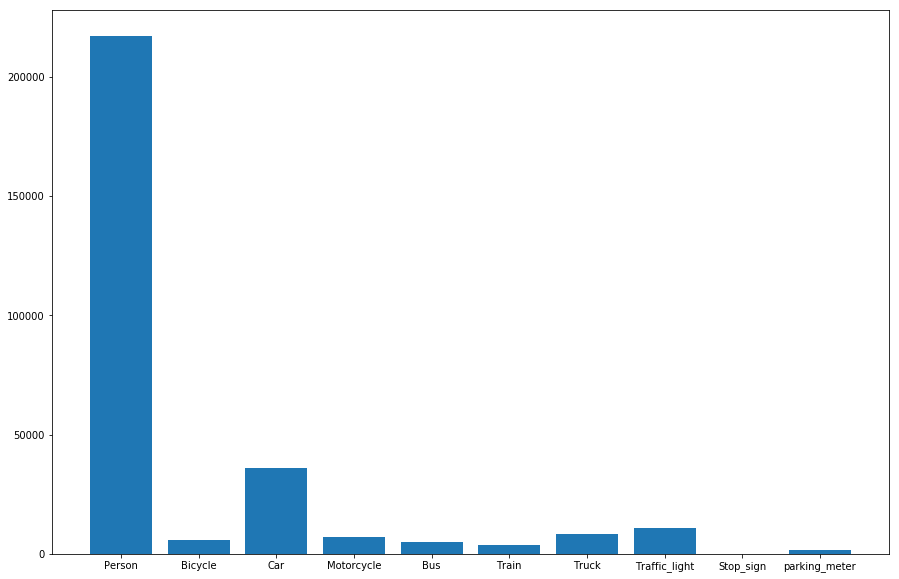

In [130]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

clas = [person, bicycle, car, motorcycle,bus,train,truck,traffic_light,stop_sign,parking_meter]
#money1 = [1,2,3,4,5,6,7,8,4,6]
x= np.arange(10)

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x,clas)
plt.xticks(x, ('Person', 'Bicycle', 'Car', 'Motorcycle','Bus','Train','Truck','Traffic_light','Stop_sign','parking_meter'))
plt.show()